In [ ]:
Import required libraries

In [12]:
import csv
import pandas as pd
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np








Function to clean and preprocess file

In [13]:
#Function to clean and preprocess both Train and Test files
def File_Cleaning_and_preprocessing(path):
    file=pd.read_csv(path)
    columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
    
    #handling missing or nan values for Age,Fare,Embarked and Cabin
    file.Age=file.Age.fillna(value=file.Age.mean())
    file.Fare=file.Fare.fillna(value=file.Fare.mean())
    file.Embarked=file.Embarked.fillna(value=file.Embarked.mode()[0])
    file.Cabin = file.apply(lambda obs: "No" if pd.isnull(obs['Cabin']) else "Yes", axis=1)

    #preprocessing the textual columns/features
    le=preprocessing.LabelEncoder()
    Text_columns=['Name','Sex','Ticket','Cabin','Embarked']
    for i in Text_columns:
        file[i]=le.fit_transform(file[i])

    #Normalizing the features except PassengerId and Survived
    for i in columns[2:]:
                mean, std = file[i].mean(), file[i].std()
                file.loc[:, i] = (file[i] - mean)/std
    return file
    



Creating the training and testing features for Black box model (svm)

In [14]:
TrainFile_for_BlackBoxModel=File_Cleaning_and_preprocessing('C:/Users/Home/Downloads/train.csv')
TestFile_for_Models=File_Cleaning_and_preprocessing('C:/Users/Home/Downloads/test.csv')

TrainFile_for_BlackBoxModel = TrainFile_for_BlackBoxModel.drop(['Name'],axis = 1)
TestFile_for_Models = TestFile_for_Models.drop(['Name'],axis = 1)
Train_features=TrainFile_for_BlackBoxModel.values[0:,2:] #Columns Passenger_Id (index 0) and Survived (index 1) are not included in the training features
Train_target=TrainFile_for_BlackBoxModel.values[:,1] #Survived (index 1) is the target feature

Test_features=TestFile_for_Models.values[0:,1:] 

clf_BlackBoxModel = svm.SVC()
clf_BlackBoxModel.fit(Train_features,Train_target)
prediction_of_BlackBoxModel=clf_BlackBoxModel.predict(Test_features)



Using decision tree as a surrogate model and visualising it 

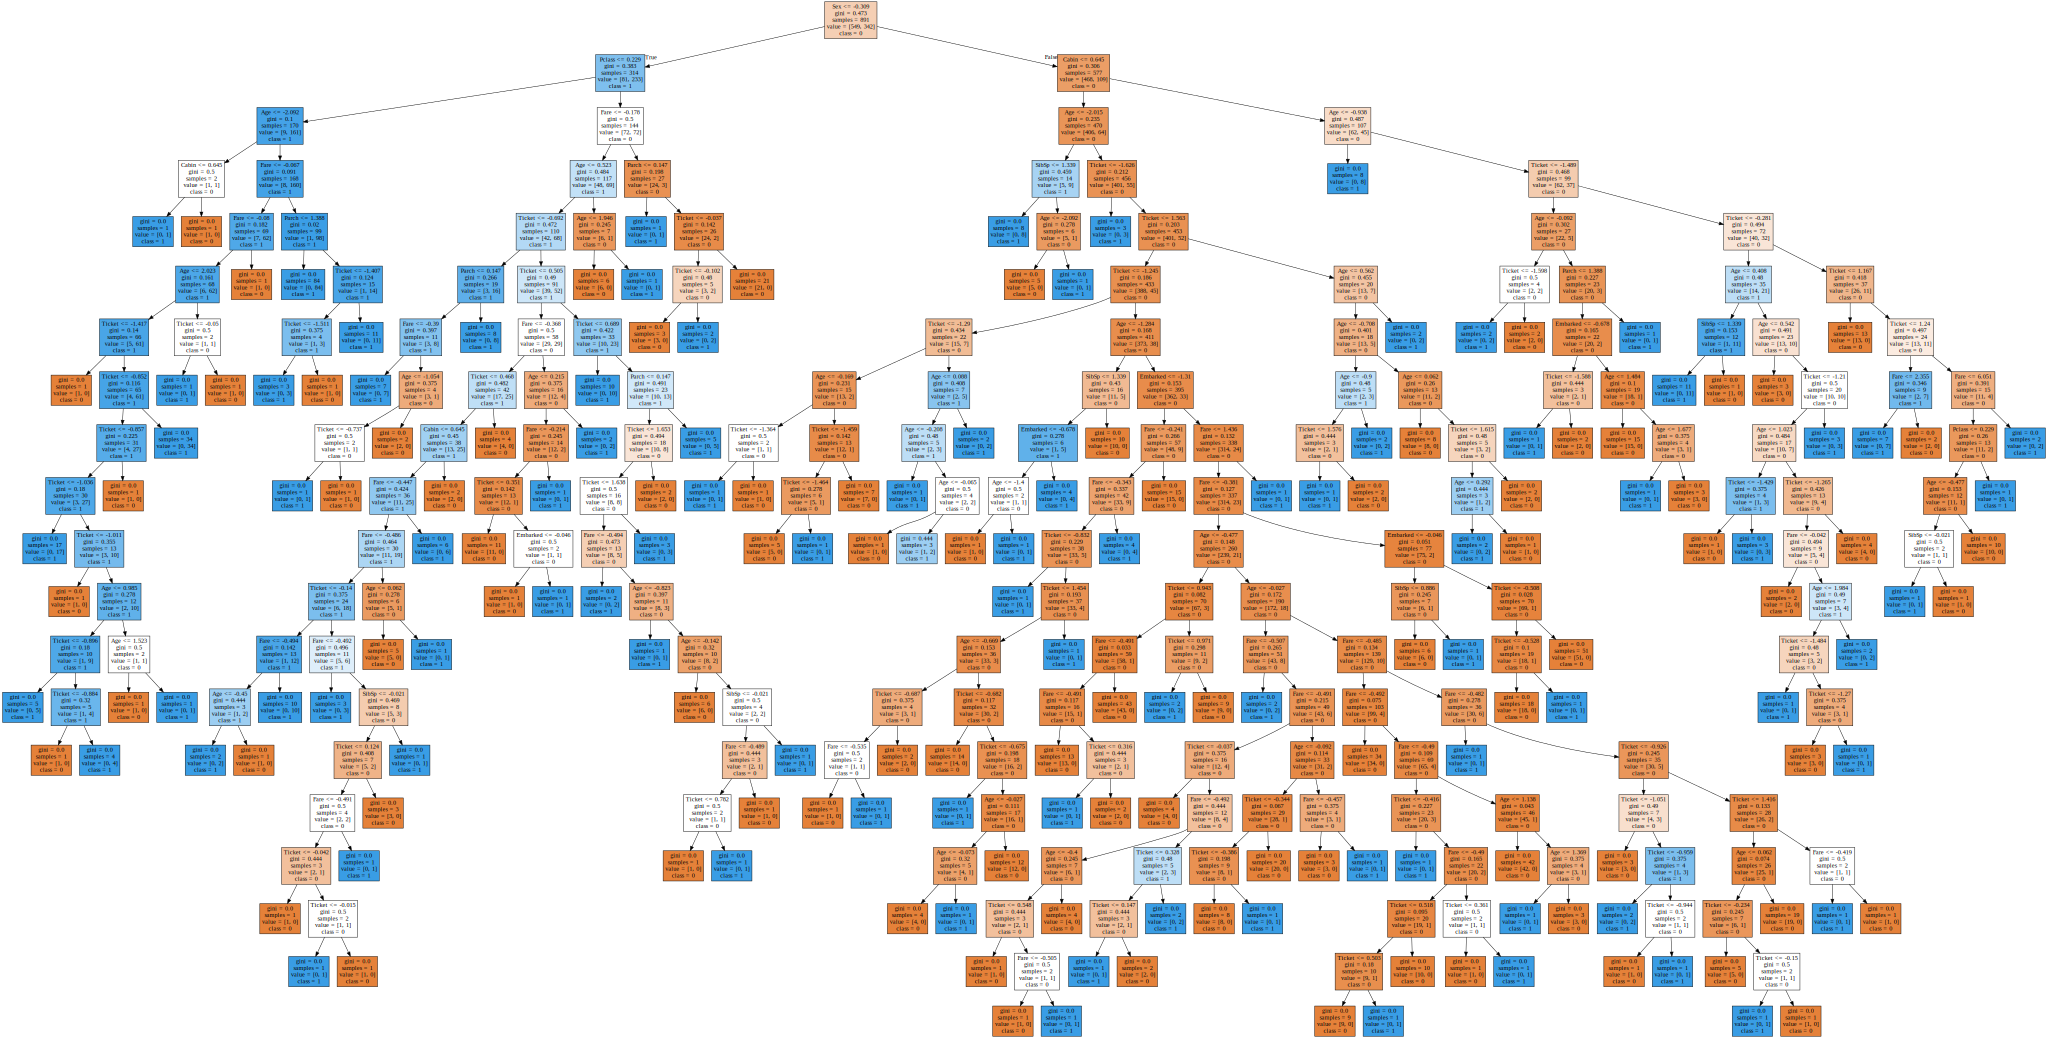

Surrogate Model: Decision Tree
R2 score: 0.131578947368
Root mean square error: 0.4482822077654243


In [17]:
clf_DecisionTree=tree.DecisionTreeClassifier()
clf_DecisionTree.fit(Train_features,Train_target)
prediction_of_DecisionTree=clf_DecisionTree.predict(Test_features)

graph = Source(tree.export_graphviz(clf_DecisionTree, out_file=None
   , feature_names=TestFile_for_Models.columns[1:], class_names=['0','1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

print("Surrogate Model: Decision Tree")
print("R2 score:",r2_score(prediction_of_BlackBoxModel,prediction_of_DecisionTree))
rmse=sqrt(mean_squared_error(prediction_of_BlackBoxModel,prediction_of_DecisionTree))
print("Root mean square error:",rmse)

using linear model as a surrogate model and interpreting it

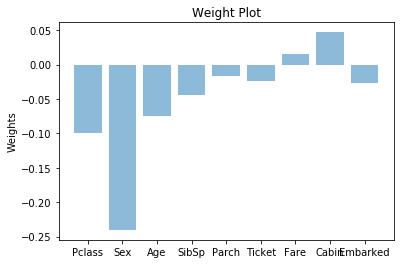

Surrogate Model: Linear Regression
R2 score: 0.63212534147
Root mean square error: 0.29176706489216603


In [18]:
clf_LinearModel=linear_model.LinearRegression()
clf_LinearModel.fit(Train_features,Train_target)
prediction_of_LinearModel=clf_LinearModel.predict(Test_features)
features = list(TestFile_for_Models.columns)[1:]
y_pos = np.arange(len(features))
weights = clf_LinearModel.coef_
 
plt.bar(y_pos, weights, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Weights')
plt.title('Weight Plot')
 
plt.show()



print("Surrogate Model: Linear Regression")
print("R2 score:",r2_score(prediction_of_BlackBoxModel,prediction_of_LinearModel))
rmse=sqrt(mean_squared_error(prediction_of_BlackBoxModel,prediction_of_LinearModel))
print("Root mean square error:",rmse)

